In [1]:
# Begin: Python 2/3 compatibility header small
# Get Python 3 functionality:
from __future__ import\
    absolute_import, print_function, division, unicode_literals
from future.utils import raise_with_traceback, raise_from
# catch exception with: except Exception as e
from builtins import range, map, zip, filter
from io import open
import six
# End: Python 2/3 compatability header small
import PIL
import matplotlib.pyplot as plt
import numpy as np
import os
import innvestigate
import innvestigate.utils
import keras.backend
import keras.applications.densenet as nnnnet
import keras.applications.vgg16 as vgg16
import keras.applications.inception_v3 as inception_v3

Using TensorFlow backend.


In [2]:
def load_image(path, size):


    #need here ret= np array with dtype np.float32 from PIL Image 
    #after the pil image was resized to (size,size)

    ret = PIL.Image.open(path)
    ret = ret.resize((size, size))
    ret = np.asarray(ret, dtype=np.uint8).astype(np.float32)
    if ret.ndim == 2:
        ret.resize((size, size, 1))
        ret = np.repeat(ret, 3, axis=-1)
    return ret

W0702 18:10:02.029618     8 deprecation_wrapper.py:119] From c:\users\user\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0702 18:10:02.049624     8 deprecation_wrapper.py:119] From c:\users\user\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 18:10:02.049624     8 deprecation_wrapper.py:119] From c:\users\user\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0702 18:10:02.072775     8 deprecation_wrapper.py:119] From c:\users\user\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Pleas

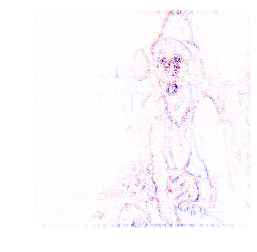

In [3]:
if __name__ == "__main__":
    # Load an image.
    # Need to download example images
    ###############################################################################
    ###############################################################################
    ###############################################################################
    #your code here
    
    for i in range(1,6):
        fn ="image"+str(i)+".jpg"
        #python -m pip install setuptools --upgrade
        #python -m pip install tensorflow
        #python -m pip install keras
        #python -m pip install innvestigate
        # (add --upgrade to the end like so if you already have it and just want an upgrade, like the first one)
        ###############################################################################
        ###############################################################################
        ###############################################################################
        # moved imports to the top.
        #modelind=0
        #analyzerind=0
        models0=['vgg16','dense121','inception_v3']
#         analyzers0=['lrp.sequential_preset_a_flat',"gradient","guided"]
#         for analyzerind in range(0,len(analyzers0)):
        for modelind in range(0,len(models0)):

            model=models0[modelind]
#             sanalyzer=analyzers0[analyzerind]
            if model == 'vgg16':            
                model, preprocess = vgg16.VGG16(), vgg16.preprocess_input
                size=224
            elif model == 'dense121':
                model, preprocess = nnnnet.DenseNet121(), nnnnet.preprocess_input 
                size=224
            elif model == 'inception_v3':
                model, preprocess = inception_v3.InceptionV3(), inception_v3.preprocess_input
                size=299

            else:
                print('err')
                exit()

            image = load_image(fn, size) 

            # Code snippet.
            plt.imshow(image/255)
            plt.axis('off')

            plt.savefig("image"+str(i)+"_resized_"+models0[modelind]+".jpg") # save the model and image...
            # the image here is going to only differ between models.
            # i'm not about to go save several of these...
            
            # Add batch axis and preprocess
            x = preprocess(image[None],backend=keras.backend) # fix for resnets



            # Strip softmax layer
            model = innvestigate.utils.model_wo_softmax(model)

            # Create analyzer
            #analyzer = innvestigate.create_analyzer("lrp.sequential_preset_b_flat", model)
#             if sanalyzer == 'lrp.sequential_preset_a_flat':
            analyzer1 = innvestigate.create_analyzer("lrp.sequential_preset_a_flat", model)
#             elif sanalyzer =="gradient":
            analyzer2 = innvestigate.create_analyzer("gradient", model)
#             elif sanalyzer =="guided":
            analyzer3 = innvestigate.create_analyzer("guided_backprop", model)
#             else:
#                 print('err2')
#                 exit()
            analyzerlist = [analyzer1,analyzer2,analyzer3]
            # Apply analyzer w.r.t. maximum activated output-neuron
            analyzers0=['lrp.sequential_preset_a_flat',"gradient","guided"]
            for inner_index in range(3):
                sanalyzer=analyzers0[inner_index]
                a = analyzerlist[inner_index].analyze(x)
                # Aggregate along color channels and normalize to [-1, 1]
                a = a.sum(axis=np.argmax(np.asarray(a.shape) == 3))
                a /= np.max(np.abs(a))
                # Plot
                plt.imshow(a[0], cmap="seismic", clim=(-1, 1))
                plt.axis('off')
                plt.savefig("image"+str(i)+"_"+sanalyzer+"_output_"+models0[modelind]+".jpg")
                



